In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [99]:
df = pd.read_csv("../data/adult.csv")
df.replace("?", pd.NA, inplace=True)
cleaned_df = df.dropna(inplace=True)
valid_salary_categories = ['<=50K', '>50K']
df_cleaned = cleaned_df[cleaned_df['salary'].isin(valid_salary_categories)]

df_cleaned = df_cleaned[
    ((df_cleaned['salary'] == '<=50K') & (df_cleaned['salary $K'] <= 50)) |
    ((df_cleaned['salary'] == '>50K') & (df_cleaned['salary $K'] > 50))
]

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,39
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,27
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,43
4,4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K,36
32557,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173
32558,32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K,40
32559,32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K,38


# Task 1
Print the count of men and women in the dataset.

In [100]:
# write your code for task 1 here
men_count = df[df["sex"] == "Male"].count()
woman_count = df[df["sex"] == "Female"].count()
print(men_count, "\n", woman_count)

Unnamed: 0        20380
age               20380
workclass         20380
education         20380
marital-status    20380
occupation        20380
relationship      20380
race              20380
sex               20380
hours-per-week    20380
native-country    20380
salary            20380
salary K$         20380
dtype: int64 
 Unnamed: 0        9782
age               9782
workclass         9782
education         9782
marital-status    9782
occupation        9782
relationship      9782
race              9782
sex               9782
hours-per-week    9782
native-country    9782
salary            9782
salary K$         9782
dtype: int64


# Task 2
Find the average age of men in dataset

In [101]:
# write your code for task 2 here
mens = df[df["sex"] == "Male"]
mens["age"].mean()

np.float64(39.18400392541707)

# Task 3
Get the percentage of people from Poland (native-country)

In [102]:
# write your code for task 3 here
all_country = df.shape[0]
polish = df[df["native-country"] == "Poland"].shape[0]
polish_percentage = (polish / all_country) * 100
polish_percentage

0.18566408063125786

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [103]:
# write your code for task 4 here
more = df[df["salary"] == ">50K"]
more_mean = more["age"].mean()
more_std = more["age"].std()

less = df[df["salary"] == "<=50K"]
less_mean = less["age"].mean()
less_std = less["age"].std()

# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [104]:
# write your code for task 5 here
higher_education = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
people_without_education = df[(~df["education"].isin(higher_education)) & (df["salary"] == ">50K")]
people_without_education

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
7,7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
10,10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116
55,55,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,341
67,67,53,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,40,United-States,>50K,225
68,68,49,Self-emp-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K,194
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32462,32462,48,Self-emp-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,>50K,343
32518,32518,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,116
32519,32519,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50K,239
32557,32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [105]:
# write your code for task 6 here
education_group = df.groupby("education")["age"].describe()
education_group

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [106]:
# write your code for task 7 here
men_df = df[df["sex"] == "Male"].copy()
men_df["martial_status_group"] = men_df["marital-status"].str.startswith("Married")
salary_comparison = men_df.groupby(["martial_status_group", "salary"]).size().unstack()
salary_comparison

salary,<=50K,>50K
martial_status_group,,
False,6932,673
True,7052,5723


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [107]:
# write your code for task 8 here
max_hours_per_week = df["hours-per-week"].max()
people_with_same_hours_per_week = df[df["hours-per-week"] == max_hours_per_week].count()
people_with_same_hours_per_week

Unnamed: 0        78
age               78
workclass         78
education         78
marital-status    78
occupation        78
relationship      78
race              78
sex               78
hours-per-week    78
native-country    78
salary            78
salary K$         78
dtype: int64

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

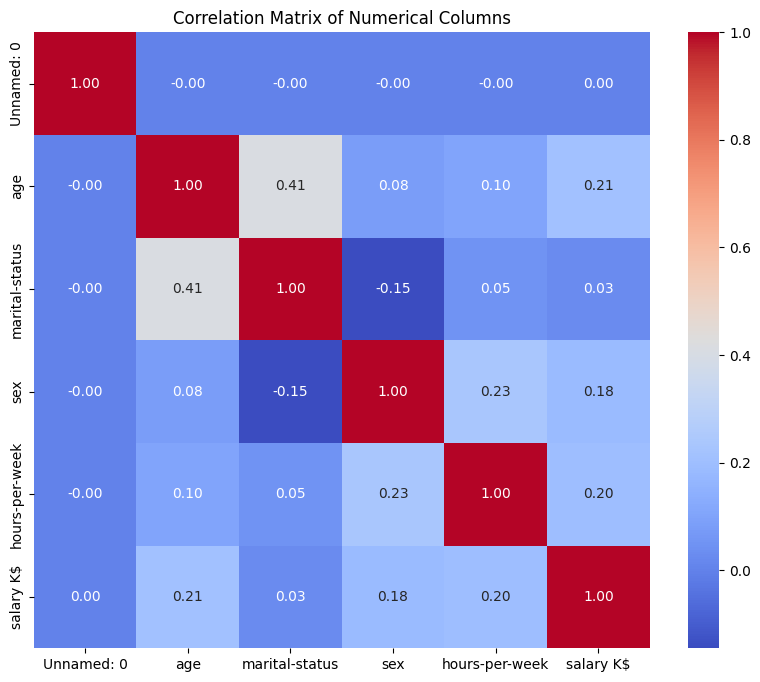

Most correlated fields (excluding self-correlation):
age             marital-status    0.412946
marital-status  age               0.412946
hours-per-week  sex               0.231268
sex             hours-per-week    0.231268
salary K$       age               0.208203
age             salary K$         0.208203
salary K$       hours-per-week    0.196378
hours-per-week  salary K$         0.196378
salary K$       sex               0.182642
sex             salary K$         0.182642
dtype: float64


In [108]:
# write your code for task 9 here
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

df['marital-status'] = df['marital-status'].map({
    'Never-married': 0,
    'Married-civ-spouse': 1,
    'Divorced': 2,
    'Separated': 3,
    'Widowed': 4,
    'Married-spouse-absent': 5,
    'Married-AF-spouse': 6
})

numeric_columns = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

max_corr = correlation_matrix.unstack().sort_values(ascending=False)
max_corr = max_corr[max_corr < 1]

print("Most correlated fields (excluding self-correlation):")
print(max_corr.head(10))